In [1]:
import matplotlib.pyplot as plt
from matplotset import generate_shape
import matplotlib as mpl
import numpy as np

In [2]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams["font.size"] = 16

In [3]:
x_offset, y_offset = -1.0, -0.6

cart_xs, cart_ys = generate_shape(3, scale=0.1, x_offset=x_offset, y_offset=y_offset, seed=10)
_cart_xs, _cart_ys = generate_shape(5, scale=0.1, seed=5)

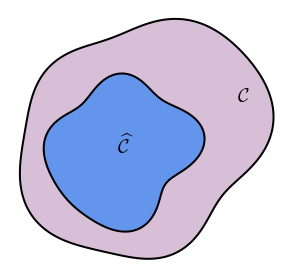

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.fill(_cart_xs, _cart_ys, facecolor="thistle", edgecolor="black", linewidth=2)
ax.fill(cart_xs, cart_ys, facecolor="cornflowerblue", edgecolor="black", linewidth=2)

ax.text(x_offset, y_offset, r"$\widehat{\mathcal{C}}$", fontsize=20)
ax.text(4.0, 1.5, r"$\mathcal{C}$", fontsize=20)

ax.axis("off")
ax.set_aspect("equal")

plt.savefig("imgs/demo.png", dpi=200, transparent=False, bbox_inches="tight")
plt.show()

In [5]:
cart_xs, cart_ys, rhos, phis = generate_shape(3, scale=0.1, x_offset=x_offset, y_offset=y_offset, seed=10, return_polar=True)
_cart_xs, _cart_ys, _rhos, _phis = generate_shape(3, scale=0.1, x_offset=x_offset, y_offset=y_offset, seed=400, return_polar=True)

In [6]:
min_idx = np.argmin(np.vstack((rhos[np.newaxis, :], _rhos[np.newaxis, :])), axis=0)
xs = np.vstack((cart_xs[np.newaxis, :], _cart_xs[np.newaxis, :]))[min_idx, np.arange(1000)]
ys = np.vstack((cart_ys[np.newaxis, :], _cart_ys[np.newaxis, :]))[min_idx, np.arange(1000)]

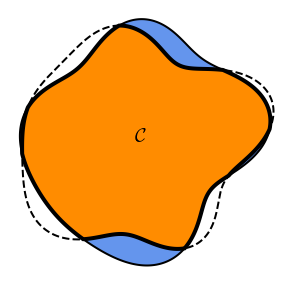

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.fill(cart_xs, cart_ys, facecolor="cornflowerblue", edgecolor="black", linewidth=2)
ax.plot(_cart_xs, _cart_ys, color="black", linewidth=2, linestyle="dashed")
ax.fill(xs, ys, facecolor="darkorange", edgecolor="black", linewidth=4)
ax.text(x_offset, y_offset, r"$\mathcal{C}$", fontsize=20)

ax.axis("off")
ax.set_aspect("equal")

plt.savefig("imgs/demo_intersect.png", dpi=200, transparent=False, bbox_inches="tight")
plt.show()

In [8]:
def ellipse_polar(theta, a=5, b=1):
    rs = (a * b) / (np.sqrt(b * b * np.cos(theta) * np.cos(theta)  + a * a * np.sin(theta) * np.sin(theta)))
    xs = rs * np.cos(theta)
    ys = rs * np.sin(theta)
    
    return rs, xs, ys

In [9]:
cart_xs, cart_ys, rhos, phis = generate_shape(3, scale=0.1, seed=10, nums=10000, return_polar=True)
thetas = np.linspace(0.0, 2*np.pi, 10000)
rs, _cart_xs, _cart_ys = ellipse_polar(thetas)

In [10]:
min_idx = np.argmin(np.vstack((rhos[np.newaxis, :], rs[np.newaxis, :])), axis=0)
xs = np.vstack((cart_xs[np.newaxis, :], _cart_xs[np.newaxis, :]))[min_idx, np.arange(10000)]
ys = np.vstack((cart_ys[np.newaxis, :], _cart_ys[np.newaxis, :]))[min_idx, np.arange(10000)]

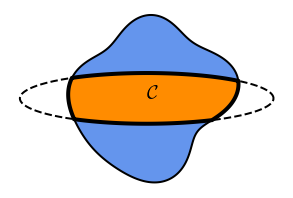

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.fill(cart_xs, cart_ys, facecolor="cornflowerblue", edgecolor="black", linewidth=2)
ax.plot(_cart_xs, _cart_ys, color="black", linewidth=2, linestyle="dashed")
ax.fill(xs, ys, facecolor="darkorange", edgecolor="black", linewidth=4)
ax.text(0, 0, r"$\mathcal{C}$", fontsize=20)

ax.axis("off")
ax.set_aspect("equal")

plt.savefig("imgs/demo_intersect.png", dpi=200, transparent=False, bbox_inches="tight")
plt.show()